In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import uuid
import os

In [15]:
sns.set_palette("deep")

In [16]:
os.makedirs('plots', exist_ok=True)

In [17]:
df = pd.read_csv('data.csv')

In [18]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df['Date Local'] = pd.to_datetime(df['Date Local'], errors='coerce')
df['Year'] = df['Date Local'].dt.year
df['Month'] = df['Date Local'].dt.month
df['State_County_City'] = df['State'] + '_' + df['County'] + '_' + df['City']

In [19]:
for col in ['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean', 'NO2 1st Max Value', 'O3 1st Max Value', 'SO2 1st Max Value', 'CO 1st Max Value']:
    df[col] = df[col].clip(lower=0)

In [20]:
df['SO2 AQI'] = df['SO2 AQI'].fillna(df['SO2 AQI'].median())
df['CO AQI'] = df['CO AQI'].fillna(df['CO AQI'].median())

### Yearly Mean NO2 AQI

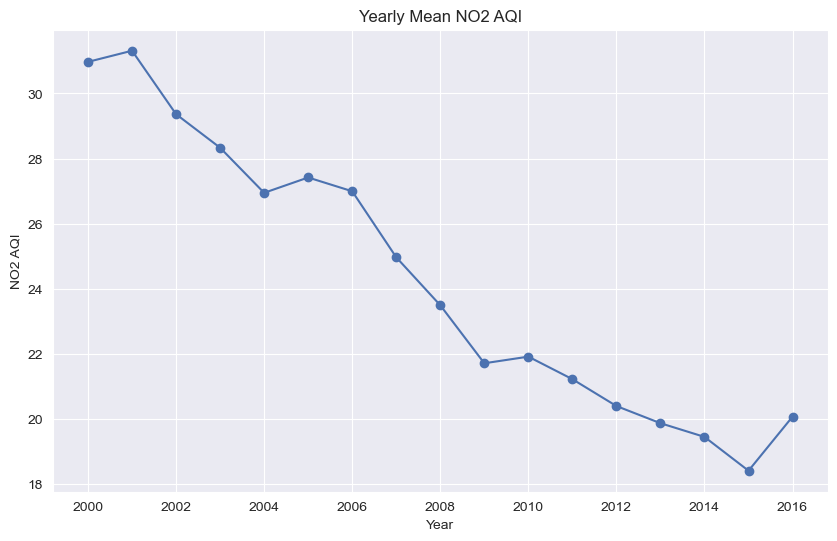

In [21]:
plt.figure(figsize=(10, 6))
yearly_no2 = df.groupby('Year')['NO2 AQI'].mean()
plt.plot(yearly_no2.index, yearly_no2.values, marker='o')
plt.title('Yearly Mean NO2 AQI')
plt.xlabel('Year')
plt.ylabel('NO2 AQI')
plt.grid(True)
plt.savefig('plots/yearly_no2_aqi.png')
plt.show()
plt.close()

### Monthly Mean O3 AQI

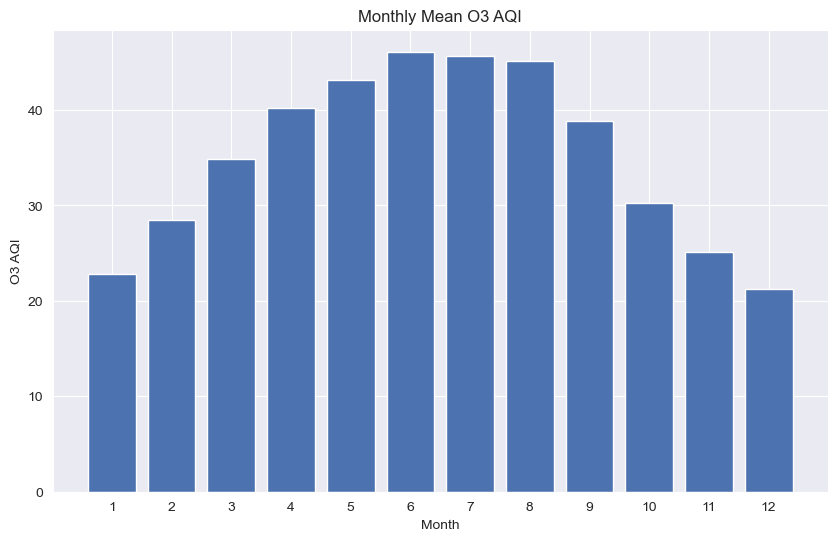

In [22]:
plt.figure(figsize=(10, 6))
monthly_o3 = df.groupby('Month')['O3 AQI'].mean()
plt.bar(monthly_o3.index, monthly_o3.values)
plt.title('Monthly Mean O3 AQI')
plt.xlabel('Month')
plt.ylabel('O3 AQI')
plt.xticks(range(1, 13))
plt.savefig('plots/monthly_o3_aqi.png')
plt.show()
plt.close()